<a href="https://colab.research.google.com/github/atharvxaa/projects.atharv/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

Reading The Csv File 
 

In [6]:
df = pd.read_csv('/content/Advertising.csv')

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 5)

In [9]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

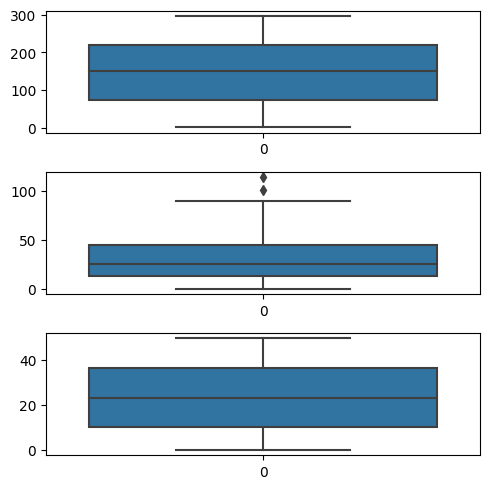

In [14]:
fig,axs = plt.subplots(3,figsize = (5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

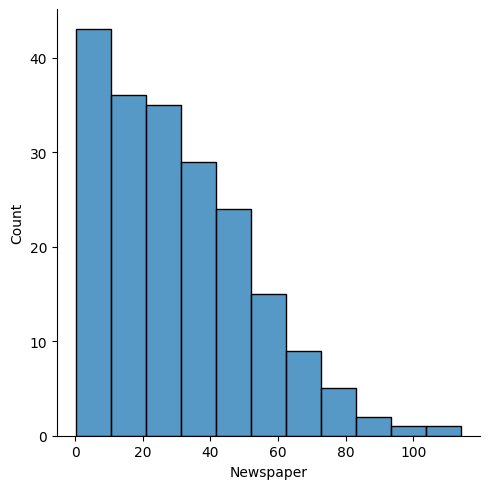

In [15]:
sns.displot(df['Newspaper'])

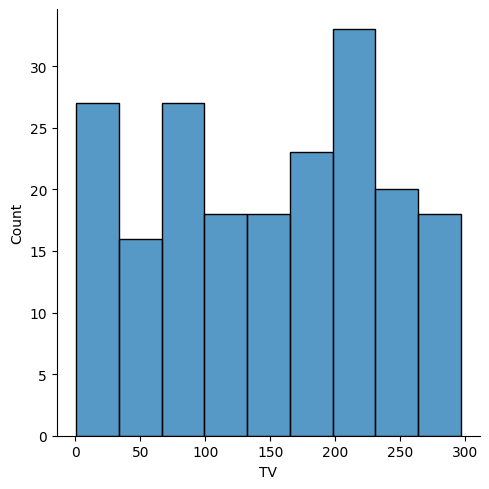

In [16]:
sns.displot(df['TV'])

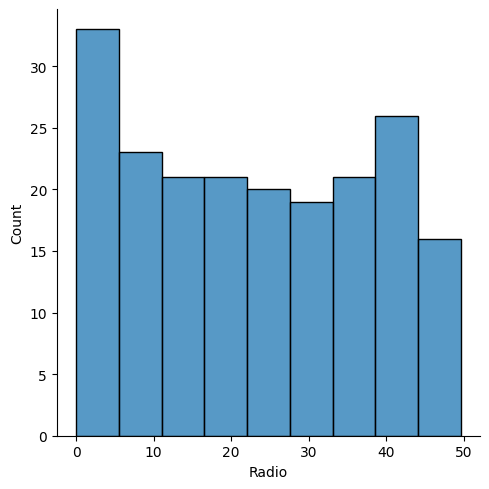

In [17]:
sns.displot(df['Radio'])

In [18]:
iqr=df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [19]:
lower_bridge=df["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75)-(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
-3.4250000000000043


In [20]:
data =df.copy()

In [21]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<Axes: >

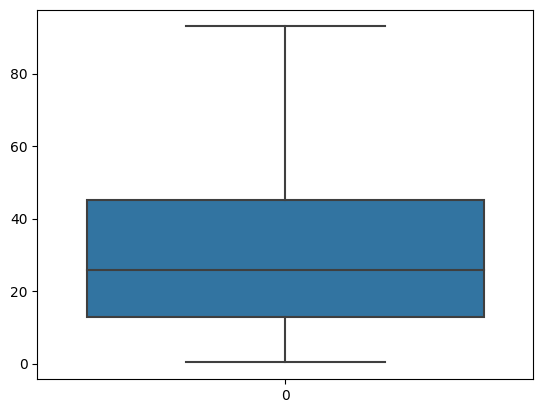

In [22]:
sns.boxplot(data['Newspaper'])

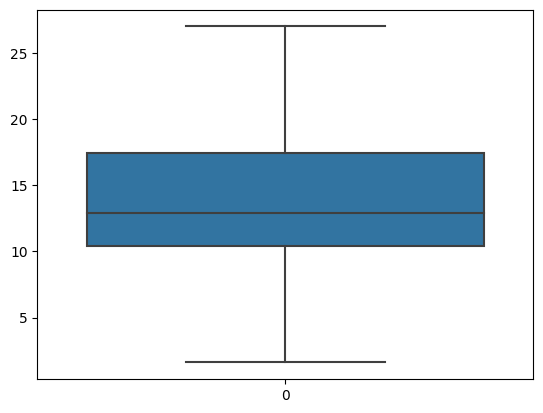

In [23]:
sns.boxplot(data['Sales']);

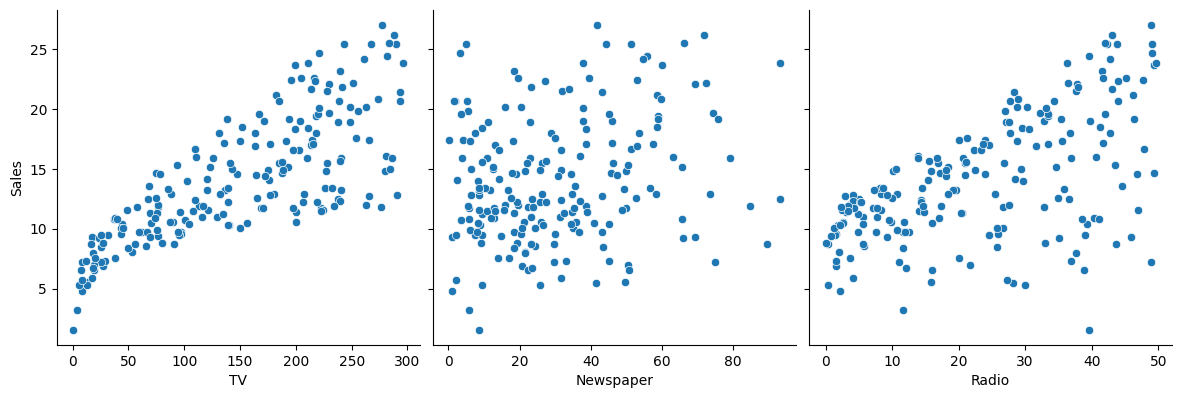

In [24]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

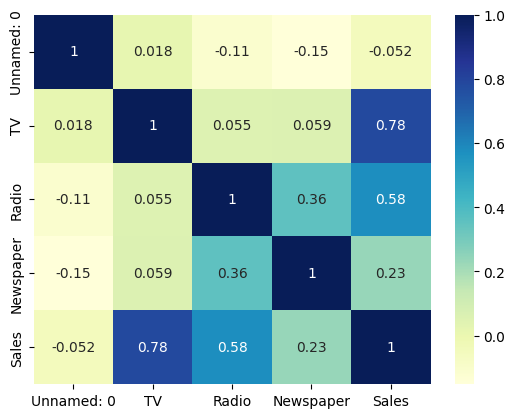

In [25]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot = True)
plt.show()

In [26]:
x=data['TV']
Y=data['Sales']

In [27]:
X=x.values.reshape(-1,1)

In [28]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [29]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [30]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [31]:
print(X.shape,Y.shape)

(200, 1) (200,)


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.33)

In [34]:
print(X_train.shape,Y_train.shape)

(134, 1) (134,)


In [35]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [36]:
knn=KNeighborsRegressor().fit(X_train,Y_train)
knn

KNeighborsRegressor()

In [37]:
knn_train_pred=knn.predict(X_train)

In [38]:
knn_test_pred=knn.predict(X_test)

In [40]:
print(knn_train_pred,knn_test_pred)

[11.58 15.3   5.7  10.4  17.3  22.56 18.   14.06 14.6   9.16 17.7  20.96
  5.28 17.7  10.74 15.04 15.3  16.34 10.44 17.6  11.62 12.78  7.64 18.38
 14.36 18.74 10.56 11.22 15.14 17.6  10.74 11.22 22.56 20.96 10.44 11.22
 10.92 12.78 16.34 11.58  9.86 16.34 18.38 15.18 15.18 18.9  11.2  16.34
 18.7  15.14  7.72 14.5   4.16 14.36 14.06 15.04 17.3  15.3  14.34 14.74
 14.66  9.98 10.58  5.7  11.44 17.3   8.34 11.96  9.32  7.72 14.7  20.16
 17.3  15.04 14.36 15.18 18.7  11.58 11.58 17.7  16.18 18.96 20.96 18.5
 14.1  20.62  7.72 13.76  4.16 20.36 11.58 11.22  8.34  8.4  12.22 20.62
  6.96 13.76 10.44 10.96 23.16 15.14  6.96 16.08  8.34 17.7   7.72 10.36
 14.7  10.26 14.66 10.96 16.7  18.96 15.14 16.7  16.18  8.34 17.3   5.28
 23.16  9.26  7.64 13.8  15.28 14.82  7.64 14.7  13.58 23.16 10.36 10.74
 10.56 18.38] [15.04 23.16 18.   10.74 10.74 18.38 22.56 17.3   8.9  10.96 11.44 17.9
 10.4  22.56 18.9  18.96 10.96 22.56  8.9   5.28 18.38  9.86 11.44 23.16
 20.96 15.08 11.8  22.56 15.   23.16 15

In [41]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R","Test RMSE","Variance"])

In [48]:
r2=r2_score(Y_test,knn_test_pred)
r2_train=r2_score(Y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"K-Nearest Neighnors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.2549700765582985
RMSE: 4.592107854292465


<ipython-input-48-7fb90281f579>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append({"Model":"K-Nearest Neighnors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)


In [43]:
Results.head()

,Model,Train R2,Test R,Test RMSE,Variance,Test R2
0,K-Nearest Neighbors,0.737703,NaN,4.592108,0.482733,0.25497


In [44]:
svr=SVR().fit(X_train,Y_train)
svr

SVR()

In [45]:
svr_train_pred=svr.predict(X_train)
svr_test_pred=svr.predict(X_test)

In [46]:
print(svr_train_pred,svr_test_pred)

[10.31092425 14.62508065  7.71531522 10.56244306 18.80840009 18.56072287
 16.8590074  12.7728426  13.00425167  9.60024925 18.32279486 17.58374392
  7.69860839 18.32279486  9.9466187  13.73675754 14.41244526 15.77361064
  8.55918936 17.01174507 11.01630792 12.30675681  7.93933769 18.41291252
 15.32794799 17.22173437 11.16868835 10.87559385 16.44739416 17.07317929
 10.05485156 10.92412568 18.613181   17.59379599  8.67009464 10.98564703
 11.62749679 12.16463291 15.93332171 10.38917811  8.89205302 15.74408439
 18.40652237 18.01443918 16.60527705 17.38254548 11.74662842 15.73818156
 17.32948122 16.39449984  7.89971186 12.91739639  7.66762149 15.10869993
 12.7997891  13.64722363 18.80318003 14.53730949 14.78600317 12.95843896
 15.00024939 11.44833465  9.90884188  7.71669705 11.84871185 18.80899202
  8.1285354  10.12042565  9.14575135  7.87473033 13.14307657 18.74942855
 18.80768629 13.08265765 15.10869993 18.12286352 17.29200827 10.32937714
 10.34780543 18.35035488 16.31791457 18.6440457  17

In [49]:
r2=r2_score(Y_test,svr_test_pred)
r2_train=r2_score(Y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model1":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.4722349484150691
RMSE: 4.592107854292465


<ipython-input-49-3370d60ebc94>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append({"Model1":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)


In [50]:
Results.head()

,Model,Train R2,Test R,Test RMSE,Variance,Test R2,Model1
0,K-Nearest Neighbors,0.737703,NaN,4.592108,0.482733,0.254970,NaN
1,K-Nearest Neighnors,0.737703,NaN,4.592108,0.482733,0.254970,NaN
2,NaN,0.652217,NaN,4.592108,0.179982,0.472235,Support Vector Machine


In [52]:
import statsmodels.api as sm

In [53]:
X_train_constant=sm.add_constant(X_train)

In [54]:
model=sm.OLS(Y_train,X_train_constant).fit()


In [55]:
model.params

const    6.610785
x1       0.050652
dtype: float64

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     286.7
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           6.79e-35
Time:                        09:38:26   Log-Likelihood:                -331.56
No. Observations:                 134   AIC:                             667.1
Df Residuals:                     132   BIC:                             672.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6108      0.488     13.546      0.0

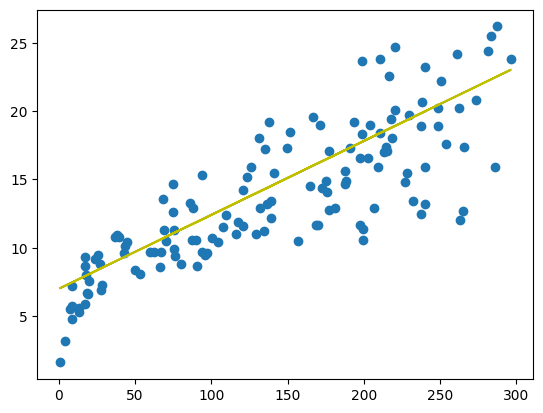

In [58]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,6.9955+0.0541*X_train,'y')
plt.show()

In [65]:
y_train_pred=model.predict(X_train_constant)
res=(Y_train-y_train_pred)
res

37     4.305535
173   -3.440527
8     -2.246389
127   -1.873049
33    -2.663870
         ...   
183    5.021793
38     1.306128
83     3.524641
196   -1.682173
27    -2.872253
Name: Sales, Length: 134, dtype: float64

<Figure size 640x480 with 0 Axes>

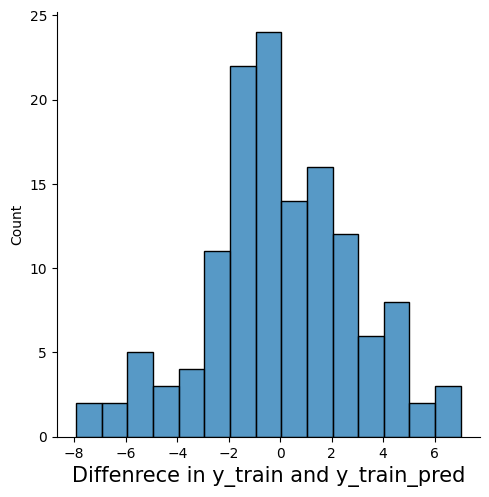

In [66]:
fig=plt.figure()
sns.displot(res,bins=15)
fig.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Diffenrece in y_train and y_train_pred',fontsize=15)
plt.show()

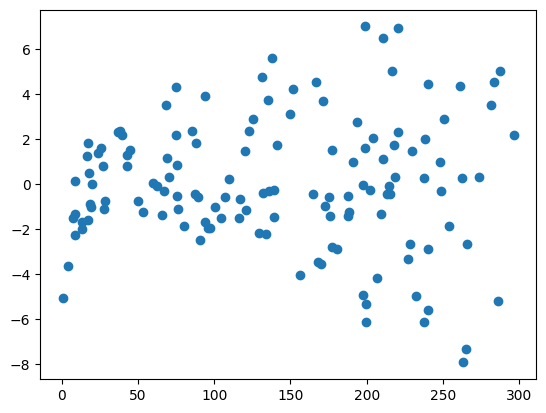

In [67]:
plt.scatter(X_train,res)
plt.show()

In [68]:
X_test_constant=sm.add_constant(X_test)
y_pred=model.predict(X_test_constant)

In [69]:
y_pred

array([14.19840597, 21.33522746, 17.08555164, 10.04496834, 10.10575035,
       18.75705703, 20.82871067, 20.12971751,  9.45740887, 11.54932319,
       12.17233883, 16.5081225 , 10.5717458 , 20.63623429, 17.59206842,
       17.95676051, 11.48347601, 20.62610396,  9.52325605,  6.88430361,
       18.73173119,  8.87491457, 12.21792534, 21.44666115, 17.74402346,
       15.97627988, 10.32861774, 21.01105671, 16.99437862, 21.28457578,
       18.26573575, 10.47550761, 15.85978102, 11.81271192, 18.15936722,
        7.00586764, 13.84890939, 15.97627988, 17.67817628, 14.88220363,
        7.8770765 , 10.48057277, 13.67669368, 12.69911629, 14.99870249,
       14.07177677, 18.48860313, 17.87571782, 13.71721502, 17.42491788,
       21.48211732,  8.20631241,  8.54567866,  7.88214167,  9.05726061,
       14.89233396, 17.87571782, 20.80338483, 18.92927273,  7.20340918,
        7.5630361 , 16.39668881, 12.32935904, 19.54722321, 18.04793353,
       18.85329521])

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [73]:
np.sqrt(mean_squared_error(Y_test,y_pred))

3.9136819737333686

In [75]:
r2= r2_score(Y_test,y_pred)
r2

0.4588463144923417

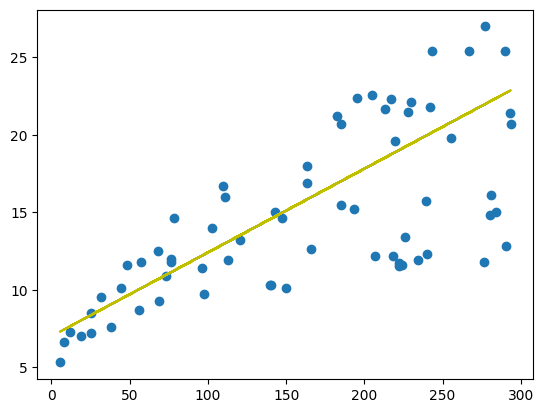

In [76]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,6.995+0.0541*X_test,'y')
plt.show()